# Install Dependencies and Setup

In [55]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

^C


In [56]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
from IPython.display import HTML

In [57]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [58]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [59]:
tf.config.list_physical_devices('GPU')

[]

# Remove dodgy images

In [60]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [61]:
import cv2
import imghdr

In [62]:
Product_Counting = r"C:\Product_Counting"

In [63]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [64]:
for image_class in os.listdir(Product_Counting): 
    for image in os.listdir(os.path.join(Product_Counting, image_class)):
        image_path = os.path.join(Product_Counting, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [65]:
import numpy as np
from matplotlib import pyplot as plt

In [66]:
data = tf.keras.utils.image_dataset_from_directory('C:\Product_Counting')

Found 44 files belonging to 2 classes.


In [67]:
data_iterator = data.as_numpy_iterator()

In [68]:
batch = data_iterator.next()

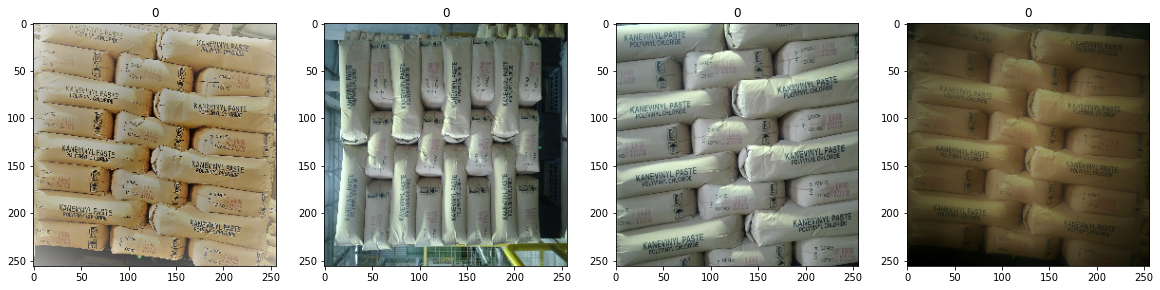

In [71]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [72]:
data = data.map(lambda x,y: (x/255, y))

In [73]:
data.as_numpy_iterator().next()

(array([[[[2.89741601e-03, 3.17423255e-03, 2.92817340e-03],
          [2.88023241e-03, 3.17242788e-03, 2.87581701e-03],
          [2.89807422e-03, 3.17489076e-03, 2.92883161e-03],
          ...,
          [1.78507064e-03, 2.23105308e-03, 2.47711223e-03],
          [1.81714958e-03, 2.26313202e-03, 2.50919117e-03],
          [1.78933586e-03, 2.28145416e-03, 2.51213484e-03]],
 
         [[2.78977002e-03, 3.06658656e-03, 2.82052741e-03],
          [2.78438581e-03, 3.07658105e-03, 2.77997041e-03],
          [2.77826609e-03, 3.05508287e-03, 2.80902372e-03],
          ...,
          [1.95561023e-03, 2.40159268e-03, 2.64765183e-03],
          [1.83006539e-03, 2.27604783e-03, 2.52210698e-03],
          [1.76661310e-03, 2.27701641e-03, 2.53748568e-03]],
 
         [[2.67952820e-03, 3.00248107e-03, 2.77180038e-03],
          [2.66933138e-03, 2.94614793e-03, 2.72201537e-03],
          [2.66414951e-03, 2.94096605e-03, 2.69490690e-03],
          ...,
          [1.85643742e-03, 2.32647895e-03, 2.5337

# Split Data

In [106]:
train_size = int(len(data)*.5)
val_size = int(len(data)*.5)
test_size = int(len(data)*.5)

In [107]:
train_size

1

In [108]:
test_size

1

In [109]:
val_size

1

In [110]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [111]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [113]:
model = Sequential()

In [114]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

# Train

In [117]:
logdir='logs'

In [118]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [119]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.6929 - accuracy: 0.8438 - val_loss: 0.6569 - val_accuracy: 0.8333
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.6597 - accuracy: 0.8125 - val_loss: 0.5329 - val_accuracy: 0.9167
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.5665 - accuracy: 0.8438 - val_loss: 0.2932 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.4628 - accuracy: 0.8438 - val_loss: 0.6535 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.5150 - accuracy: 0.8125 - val_loss: 0.9436 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.5618 - accuracy: 0.8125 - val_loss: 0.2916 - val_accuracy: 0.9167
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.5341 - accuracy: 0.8125 - val_loss: 0.4584 - val_accuracy: 0.8333
Epoch 8/20
1/1 [=========================

# Plot Performance

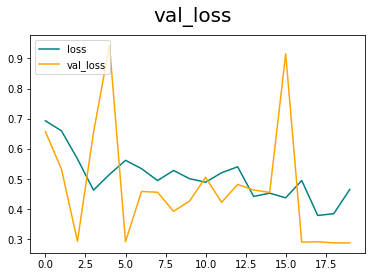

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
fig.suptitle('val_loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

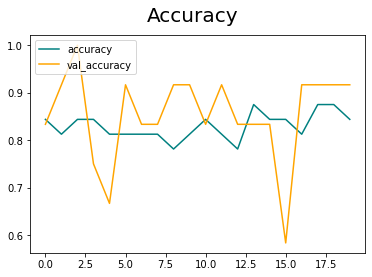

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [122]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [125]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Test

In [126]:
import cv2

TypeError: Image data of dtype object cannot be converted to float

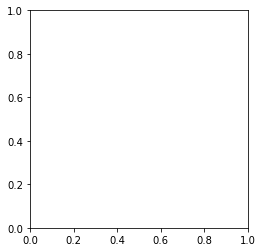

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Murad\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Murad\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Murad\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Murad\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\Murad\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Murad\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Murad\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Murad\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.9.3-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.2-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.8.4-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.3-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.2-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.1-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached tensorflow_gpu-2.7.4-cp39-cp39-win_amd64.whl (436.8 MB)
  Us

In [131]:
img = cv2.imread('44.jpg')
plt.imshow(img)
plt.show()

In [128]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [129]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Murad\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.9.3-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.2-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.8.4-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.3-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.2-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.1-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.wh

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# Save the Model

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join('models','imageclassifier.h5'))

In [104]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [105]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined